In [1]:
!pip install chart_studio
!pip install cufflinks
!pip install -U kaleido
!pip install pvlib

In [2]:
import pvlib
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
%matplotlib inline

In [3]:
build_25_global=pd.read_csv('studienkolleg_global.csv',skiprows=8,nrows=8784,
                     index_col=0)

In [4]:
build_25_components=pd.read_csv('studienkolleg_components.csv',skiprows=8,nrows=8784,
                     index_col=0)

In [5]:
poa_build_25=pd.DataFrame(columns=['poa_global','poa_direct','poa_diffuse','temp_air','wind_speed'],
                       index=build_25_global.index)

In [6]:
poa_build_25['poa_global']=build_25_global['G(i)']
poa_build_25['poa_direct']=build_25_components['Gb(i)']
poa_build_25['poa_diffuse']=build_25_components['Gd(i)']+build_25_components['Gr(i)']
poa_build_25['temp_air']=build_25_components['T2m']
poa_build_25['wind_speed']=build_25_components['WS10m']

In [7]:
poa_build_25.index=pd.to_datetime(poa_build_25.index,format='%Y%m%d:%H%M')

In [8]:
location=Location(latitude=51.4984,
                  longitude=10.7931,
                  tz='Europe/Berlin',
                  altitude=202,
                  name='Building_25')

In [9]:
cec=pvlib.pvsystem.retrieve_sam('CECmod')
cec_inverters=pvlib.pvsystem.retrieve_sam('CECInverter')

In [10]:
module=cec['Hanwha_Q_CELLS_Q_PEAK_L_G4_2_370']
inverter=cec_inverters['ABB__TRIO_60_0_TL_OUTD_US_480__480V_']
inverter_1=cec_inverters['ABB__UNO_7_6_TL_OUTD_S_US_Z_M__277V_']
temperature_parameters=TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [11]:
cec['Hanwha_Q_CELLS_Q_PEAK_L_G4_2_370']

Technology           Multi-c-Si
Bifacial                      0
STC                    370.0012
PTC                       340.6
A_c                       1.946
Length                     1.97
Width                     0.988
N_s                          72
I_sc_ref                   9.89
V_oc_ref                  48.28
I_mp_ref                   9.41
V_mp_ref                  39.32
alpha_sc               0.003758
beta_oc               -0.139529
T_NOCT                     45.5
a_ref                   1.86472
I_L_ref                9.997571
I_o_ref                     0.0
R_s                     0.35409
R_sh_ref             407.904602
Adjust                 8.079701
gamma_r                  -0.394
BIPV                          N
Version       SAM 2018.11.11 r2
Date                   1/3/2019
Name: Hanwha_Q_CELLS_Q_PEAK_L_G4_2_370, dtype: object

In [12]:
cec_inverters['ABB__TRIO_60_0_TL_OUTD_US_480__480V_']

Vac                          480
Pso                   144.161957
Paco                     60000.0
Pdco                61110.542969
Vdco                       720.0
C0                          -0.0
C1                      -0.00002
C2                      0.000759
C3                     -0.000953
Pnt                          0.8
Vdcmax                     800.0
Idcmax                 84.875754
Mppt_low                   570.0
Mppt_high                  800.0
CEC_Date              10/15/2018
CEC_Type     Utility Interactive
Name: ABB__TRIO_60_0_TL_OUTD_US_480__480V_, dtype: object

In [13]:
cec_inverters['ABB__UNO_7_6_TL_OUTD_S_US_Z_M__277V_']

Vac                          277
Pso                    41.132671
Paco                      7600.0
Pdco                 7815.418945
Vdco                       380.0
C0                     -0.000002
C1                     -0.000048
C2                     -0.001491
C3                     -0.002457
Pnt                         2.28
Vdcmax                     480.0
Idcmax                 20.566892
Mppt_low                   200.0
Mppt_high                  480.0
CEC_Date                     NaN
CEC_Type     Utility Interactive
Name: ABB__UNO_7_6_TL_OUTD_S_US_Z_M__277V_, dtype: object

In [32]:
system=PVSystem(surface_tilt=15,surface_azimuth=184,
                module_parameters=module,
                inverter_parameters=inverter,
                temperature_model_parameters=temperature_parameters,
                modules_per_string=15,strings_per_inverter=12)

In [31]:
clear

In [33]:
modelchain=ModelChain(system,location,aoi_model="physical",spectral_model="no_loss")
modelchain

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: sandia_inverter
  aoi_model: physical_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [34]:
clear

C:\Users\Gaurang\anaconda3\lib\site-packages\pvlib\tools.py:359: RuntimeWarning:

divide by zero encountered in true_divide



<AxesSubplot:xlabel='time'>

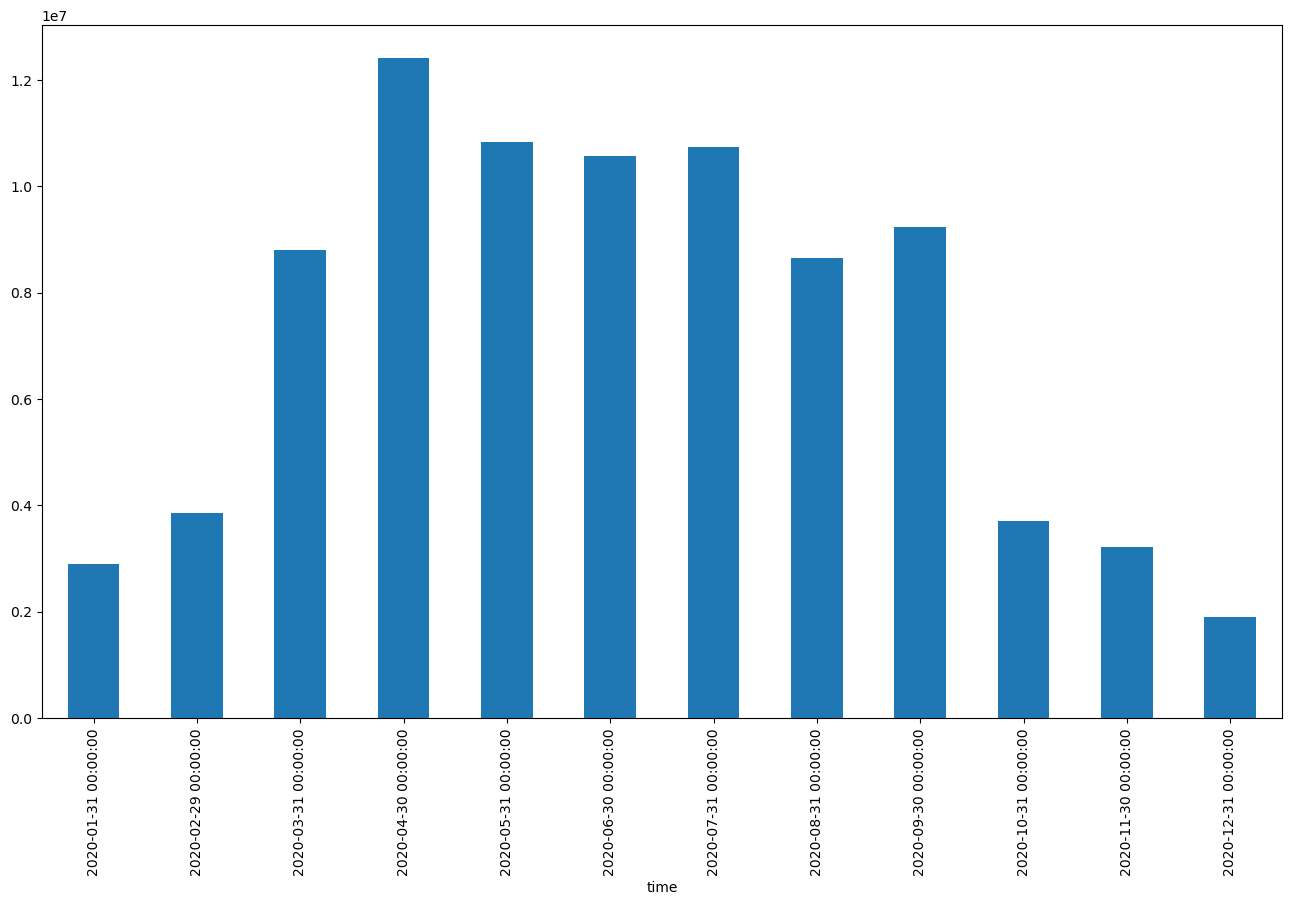

In [35]:
modelchain.run_model_from_poa(poa_build_25)
modelchain.results.ac.resample('M').sum().plot(kind='bar',figsize=(16,9))

In [36]:
clear

In [37]:
a=modelchain.results.ac.resample('M').sum()


In [38]:
en=pd.DataFrame({'inverter1':a})

In [39]:
en['inverter1'].sum()

86863326.91751292

<AxesSubplot:xlabel='time'>

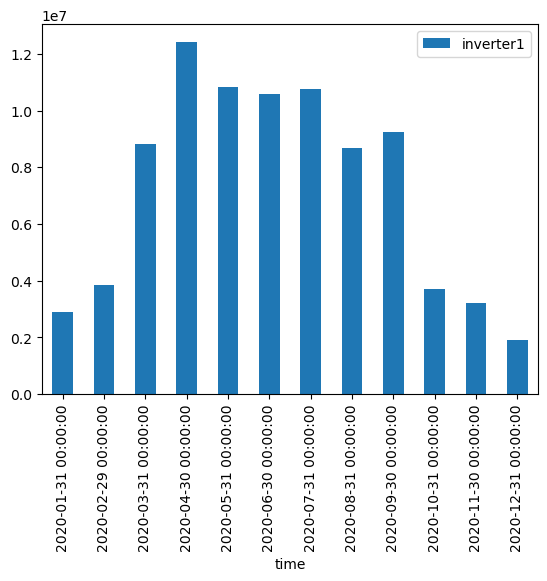

In [40]:
en.plot(kind='bar')

In [41]:
T='Times New Roman'
A='Arial'
hsn_blue='rgb(0,89,158)'
hsn_bluem='rgb(15,147,250)'
hsn_blueb='rgb(45,158,247)'
hsn_blueg='rgb(53,107,150)'
hsn_bluebl='rgb(9,47,77)'
hsn_green='rgb(103,189,0)'
hsn_greenb='rgb(144,252,15)'
hsn_greeng='rgb(120,163,69)'
hsn_greenl='rgb(193,240,137)'
hsn_greenbl='rgb(43,74,7)'
hsn_grey = 'rgb(97,98,99)'
hsn_greym= 'rgb(210,210,212)'
hsn_greyl= 'rgb(227,228,230)'

In [42]:
en['Months']=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [43]:
en['inverter1'].sum()

86863326.91751292

In [29]:
trace1=go.Bar(
        x=en['Months'],
        y=en['inverter1'],
        text=en['inverter1'],
        #textposition='auto',
        name='Energy distribution across the year',
        marker_color=hsn_bluebl)


In [44]:
data = [trace1]
fig = go.Figure(data = data)
fig.update_traces(texttemplate='%{text:.4s}',textposition='inside', opacity=1,
                  textfont=dict(family=A,size=18,color='white'))
fig.update_layout(uniformtext_minsize=20)
#fig.update_layout(xaxis_tickangle=45)
fig.update_layout(title='Energy yield of Building 25',
                  title_x=0.5,
                  yaxis_title='Energy in mega Watt hour',font=dict(size=18),
                 legend=dict(
    #itemwidth=30,
    orientation='h',
    yanchor="middle",
    y=-0.3,
    xanchor="center",
    x=0.5,
    title_font_family=A,
    font=dict(
    family=A,
    size=10,
    color=hsn_blue),
    bgcolor=hsn_greyl,
    bordercolor=hsn_blue,
    valign='bottom',
    tracegroupgap=10,
    borderwidth=1,),
    font_family=A,
    font_color=hsn_blue,
    title_font_family=A,
    title_font_color=hsn_blue,
    legend_tracegroupgap=500,
                    
)
fig.update_xaxes(title_font_family=A)
fig.update_layout(
xaxis=dict(
showline=True,showgrid=False,showticklabels=True,
linecolor=hsn_blue,
title_text="Month",
title_standoff = 10,
linewidth=3,ticks='outside',tickfont=dict(
family=A,size=15,color=hsn_blue))
,
yaxis=dict(
showline=True,showgrid=False,showticklabels=True,
linecolor=hsn_blue,
ticklabelposition="outside",
linewidth=2,ticks='outside',tickfont=dict(
family=A,size=15,color=hsn_blue)
),autosize=True,margin=dict(
autoexpand=True,l=50,r=50,b=100,t=100,pad=0),
showlegend=False,paper_bgcolor=hsn_greyl,
    plot_bgcolor=hsn_greym)
fig.show()
pio.write_image(fig, 'energy_yield_of_Building_25.png',scale=6, width=1080, height=650)